In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sandp500/getSandP.py
/kaggle/input/sandp500/all_stocks_5yr.csv
/kaggle/input/sandp500/merge.sh
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/UAA_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CAG_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/QRVO_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/KHC_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/EQIX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/O_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AIV_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMGN_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CCI_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FLS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/BHF_data.csv
/kaggle/in

## Dataset description
### The dataset contain 5 year data of stock prices in s&p company
###
All the files have the following columns:
Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded

Name - the stock's ticker name

###

In [2]:
df = pd.read_csv('/kaggle/input/sandp500/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [4]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [7]:
#convert date from object to date time

df['date'] = pd.to_datetime(df['date'])

In [21]:
#check for null values
df.isna().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [22]:
#since there are a few missing values, we fill by zero

df.fillna(0)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

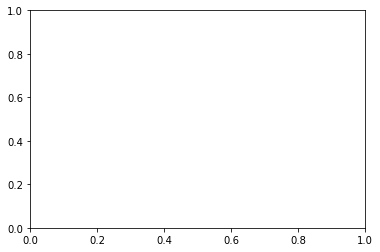

In [23]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.boxplot(df[['open','high','low','close','volume']])
plt.show()